# Q2

In [3]:
# !pip
%matplotlib inline
from keras.utils.vis_utils import plot_model
from keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [5]:
from google.colab import files
uploaded = files.upload() #upload file in drive

Saving dataset.csv to dataset.csv


In [6]:
data = pd.read_csv("dataset.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
print(data.shape)
train=[]
for i in range(data.shape[0]):
  train.append(list(data.iloc[i]))

(2000, 21)


In [8]:
x=[]
y=[]
for i in train:
  y.append(i[-1])
  x.append(i[:20])

#we should scale data's
x = (x - np.mean(x)) / np.std(x) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

#normalazie data
# normalizer = preprocessing.Normalizer()

# x_train = normalizer.fit_transform(x_train)
# x_test = normalizer.fit_transform(x_test)

print(x_train)
print(y_train)

[[ 1.76615009 -0.424152   -0.42197877 ... -0.4257043  -0.4257043
  -0.424152  ]
 [ 0.82855798 -0.424152   -0.42492815 ... -0.424152   -0.4257043
  -0.424152  ]
 [ 2.08747719 -0.424152   -0.42430723 ... -0.424152   -0.4257043
  -0.424152  ]
 ...
 [ 2.4802103  -0.424152   -0.422134   ... -0.424152   -0.4257043
  -0.424152  ]
 [ 1.33305705 -0.4257043  -0.42353108 ... -0.424152   -0.4257043
  -0.424152  ]
 [ 1.50225827 -0.424152   -0.42197877 ... -0.424152   -0.4257043
  -0.4257043 ]]
[1. 0. 0. ... 2. 1. 0.]


In [10]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)
print(y_test)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [11]:
print(x_train.shape)
print(y_train.shape)

(1600, 20)
(1600, 4)


In [12]:
model = Sequential()
model.add(Dense(300, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
### YOU HAVE TO MAKE YOUR CHANGES HERE !!!
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax')) #since we have 4 classes it's better we use softmax

#https://keras.io/api/optimizers/sgd/
model.compile(
    loss='categorical_crossentropy', #better than mse in categorical
    optimizer=SGD(learning_rate=0.001, momentum=0.9), #SGD is better since we have 300 epochs and we need more generalization
    metrics=['accuracy'],
)

history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=32,
                    verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/300
50/50 [==============================] - 1s 7ms/step - loss: 1.3795 - accuracy: 0.2456 - val_loss: 1.3401 - val_accuracy: 0.2450
Epoch 2/300
50/50 [==============================] - 0s 3ms/step - loss: 1.3270 - accuracy: 0.2788 - val_loss: 1.2785 - val_accuracy: 0.3250
Epoch 3/300
50/50 [==============================] - 0s 3ms/step - loss: 1.2588 - accuracy: 0.3794 - val_loss: 1.1965 - val_accuracy: 0.4625
Epoch 4/300
50/50 [==============================] - 0s 3ms/step - loss: 1.1793 - accuracy: 0.4644 - val_loss: 1.0843 - val_accuracy: 0.5625
Epoch 5/300
50/50 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.5281 - val_loss: 0.9881 - val_accuracy: 0.5950
Epoch 6/300
50/50 [==============================] - 0s 3ms/step - loss: 1.0092 - accuracy: 0.5437 - val_loss: 0.9095 - val_accuracy: 0.5925
Epoch 7/300
50/50 [==============================] - 0s 3ms/step - loss: 0.9165 - accuracy: 0.5844 - val_loss: 0.8324 - val_accuracy: 0.6500
Epoch 8/300
5

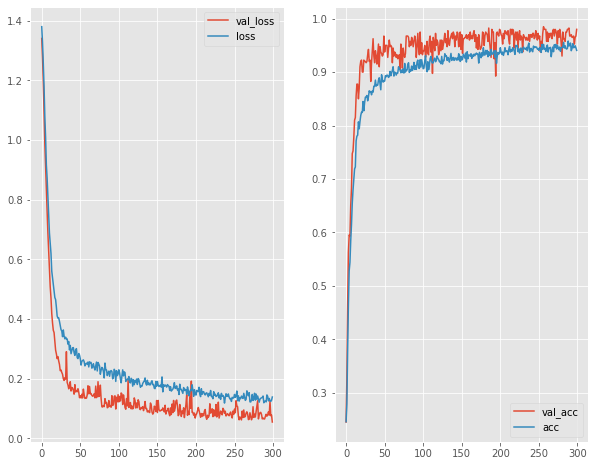

In [13]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

# plt.grid(color='w', linestyle='solid')

with plt.style.context('ggplot'): #ggplot is good for visualization
  fig, ax = plt.subplots(1, 2, figsize=(10, 8))

  ax[0].plot(history.history['val_loss'], label='val_loss')
  ax[0].plot(history.history['loss'], label='loss')
  ax[0].legend()

  ax[1].plot(history.history['val_accuracy'], label='val_acc')
  ax[1].plot(history.history['accuracy'], label='acc')
  ax[1].legend()

In [ ]:

# model.evaluate(x=None, y=None, batch_size=None, verbose=1)
model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

13/13 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9775


[0.06285836547613144, 0.9775000214576721]

# Q3

In [14]:


#constances
MAX_WORDS = 1000
NUMBER_OF_CLASSES = 46
EPOCHS = 20
BATCH_SIZE = 512


In [15]:

from tensorflow.keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=MAX_WORDS)

tokenizer = Tokenizer(num_words=MAX_WORDS)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary') #it's better if we use keras function to conver to matrix
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

print(x_train.shape)
print(x_test.shape)

y_train = tf.keras.utils.to_categorical(y_train, NUMBER_OF_CLASSES) #we should split to categories
y_test = tf.keras.utils.to_categorical(y_test, NUMBER_OF_CLASSES)

print(y_train.shape)
print(y_test.shape)

2121728/2110848 [==============================] - 0s 0us/step
(8982, 1000)
(2246, 1000)
(8982, 46)
(2246, 46)


In [16]:

def build_and_plot_model(activation_func : str, 
                loss_func : str,
                x_train, y_train, x_test, y_test,
                epochs : int, batch : int, axs): #build and test model 
  
  model = Sequential()

  model.add(Dense(64, input_shape=(MAX_WORDS,)))
  model.add(Activation('relu'))

  model.add(Dense(64))
  model.add(Activation('relu'))

  model.add(Dense(NUMBER_OF_CLASSES))
  model.add(Activation(activation_func))

  model.compile(
      loss=loss_func, 
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #adam it's better than sgd in low epochs
      metrics=['accuracy']
  )

  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.1)
  result = model.evaluate(x_test, y_test, batch_size=batch, verbose=1)
  print('loss rate:', result[0])
  print('Test accuracy rate:', result[1]) 

  axs[0].plot(history.history['val_loss'], label='val_loss')
  axs[0].plot(history.history['loss'], label='loss')
  axs[0].legend()

  axs[1].plot(history.history['val_accuracy'], label='val_acc')
  axs[1].plot(history.history['accuracy'], label='acc')
  axs[1].legend()



Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 0.5841 - accuracy: 0.0095 - val_loss: 0.4125 - val_accuracy: 0.0044
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.2501 - accuracy: 0.1012 - val_loss: 0.1303 - val_accuracy: 0.3315
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 0.1065 - accuracy: 0.4179 - val_loss: 0.0948 - val_accuracy: 0.4494
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0845 - accuracy: 0.4893 - val_loss: 0.0790 - val_accuracy: 0.5106
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0705 - accuracy: 0.5419 - val_loss: 0.0686 - val_accuracy: 0.5506
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0611 - accuracy: 0.5804 - val_loss: 0.0609 - val_accuracy: 0.6096
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0544 - accuracy: 0.6350 - val_loss: 0.0550 - val_accuracy: 0.6541
Epoch 8/20
16/16

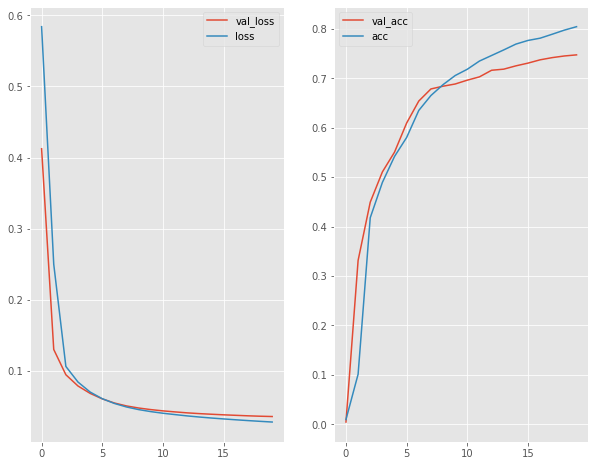

In [17]:

#Sigmoid with Binary Crossentropy

with plt.style.context('ggplot'):
  fig, axs = plt.subplots(1, 2, figsize=(10, 8))
  build_and_plot_model(
      "sigmoid",
      "binary_crossentropy",
      x_train, y_train, x_test, y_test,
      EPOCHS, BATCH_SIZE, axs
  )

Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 3.3907 - accuracy: 0.3458 - val_loss: 2.8591 - val_accuracy: 0.4972
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 2.3654 - accuracy: 0.5314 - val_loss: 1.9875 - val_accuracy: 0.5428
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.7012 - accuracy: 0.6194 - val_loss: 1.6003 - val_accuracy: 0.6518
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4265 - accuracy: 0.6745 - val_loss: 1.4337 - val_accuracy: 0.6852
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 1.2639 - accuracy: 0.7141 - val_loss: 1.3301 - val_accuracy: 0.7108
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 1.1352 - accuracy: 0.7518 - val_loss: 1.2568 - val_accuracy: 0.7319
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0266 - accuracy: 0.7766 - val_loss: 1.1970 - val_accuracy: 0.7419
Epoch 8/20
16/16 [=

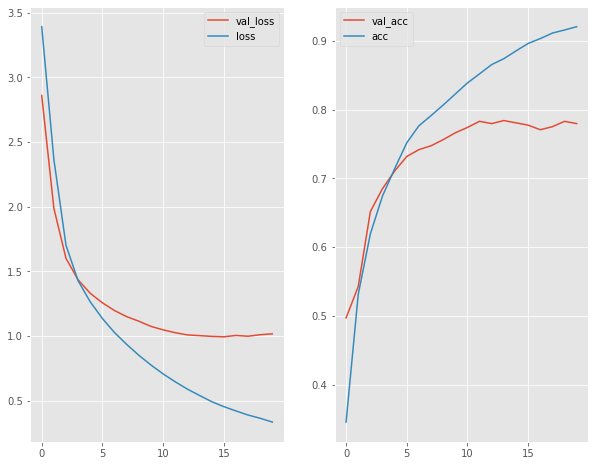

In [18]:

#Softmax and Categorical Crossentropy
with plt.style.context('ggplot'):
  fig, axs = plt.subplots(1, 2, figsize=(10, 8))
  build_and_plot_model(
      "softmax",
      "categorical_crossentropy",
      x_train, y_train, x_test, y_test,
      EPOCHS, BATCH_SIZE, axs
  )

Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 0.2167 - accuracy: 0.0173 - val_loss: 0.1583 - val_accuracy: 0.0089
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0929 - accuracy: 0.0120 - val_loss: 0.0373 - val_accuracy: 0.1268
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.3286 - val_loss: 0.0186 - val_accuracy: 0.3315
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.4607 - val_loss: 0.0155 - val_accuracy: 0.4783
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0143 - accuracy: 0.5213 - val_loss: 0.0138 - val_accuracy: 0.5184
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.5322 - val_loss: 0.0127 - val_accuracy: 0.5228
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 0.5389 - val_loss: 0.0122 - val_accuracy: 0.5261
Epoch 8/20
16/16 [=

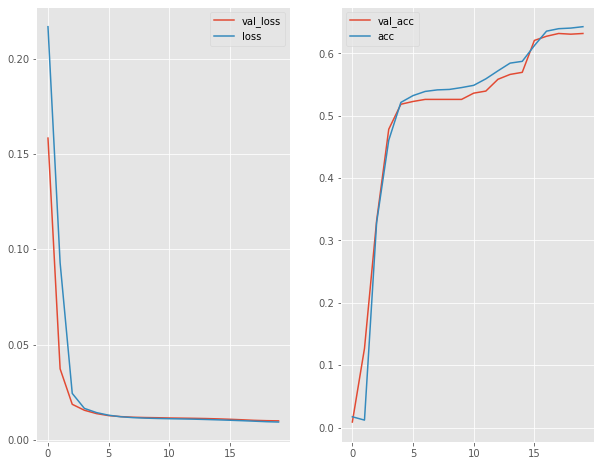

In [19]:
#Sigmoid and MSE

with plt.style.context('ggplot'):
  fig, axs = plt.subplots(1, 2, figsize=(10, 8))
  build_and_plot_model(
      "sigmoid",
      "mse",
      x_train, y_train, x_test, y_test,
      EPOCHS, BATCH_SIZE, axs
  )

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 0.0208 - accuracy: 0.3052 - val_loss: 0.0194 - val_accuracy: 0.5028
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0162 - accuracy: 0.5461 - val_loss: 0.0131 - val_accuracy: 0.5840
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0115 - accuracy: 0.6155 - val_loss: 0.0107 - val_accuracy: 0.6396
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.6726 - val_loss: 0.0098 - val_accuracy: 0.6796
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.7021 - val_loss: 0.0093 - val_accuracy: 0.7030
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0083 - accuracy: 0.7152 - val_loss: 0.0090 - val_accuracy: 0.7052
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.7265 - val_loss: 0.0087 - val_accuracy: 0.7152
Epoch 8/20
16/16

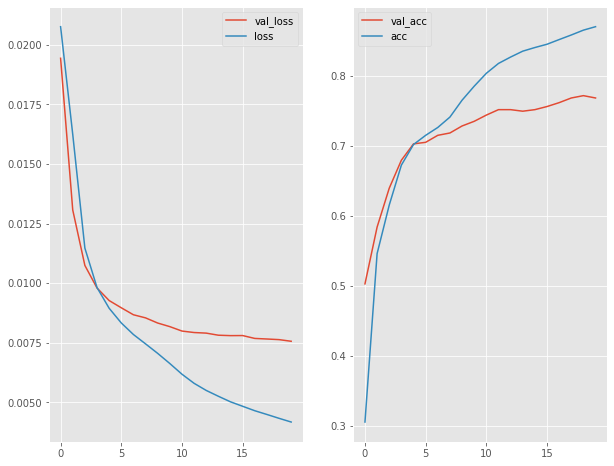

In [20]:
#Softmax and MSE

with plt.style.context('ggplot'):
  fig, axs = plt.subplots(1, 2, figsize=(10, 8))
  build_and_plot_model(
      "softmax",
      "mse",
      x_train, y_train, x_test, y_test,
      EPOCHS, BATCH_SIZE, axs
  )

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 0.0251 - accuracy: 0.2401 - val_loss: 0.0198 - val_accuracy: 0.4527
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.4959 - val_loss: 0.0164 - val_accuracy: 0.5083
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.5320 - val_loss: 0.0140 - val_accuracy: 0.5284
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.5533 - val_loss: 0.0128 - val_accuracy: 0.5473
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0119 - accuracy: 0.5922 - val_loss: 0.0119 - val_accuracy: 0.5918
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.6378 - val_loss: 0.0114 - val_accuracy: 0.6307
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.6713 - val_loss: 0.0109 - val_accuracy: 0.6618
Epoch 8/20
16/16 [=

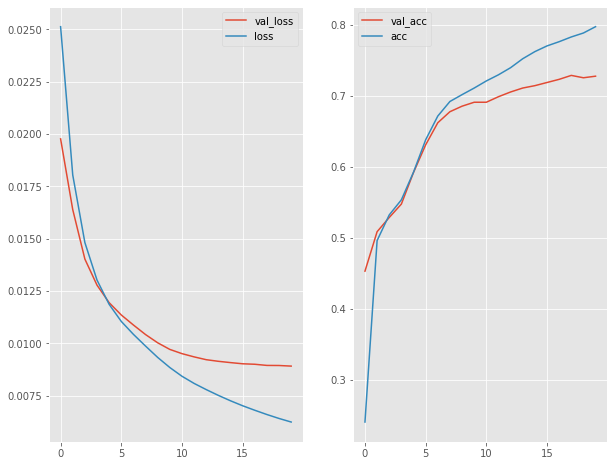

In [21]:
#Linear and MSE

with plt.style.context('ggplot'):
  fig, axs = plt.subplots(1, 2, figsize=(10, 8))
  build_and_plot_model(
      "linear",
      "mse",
      x_train, y_train, x_test, y_test,
      EPOCHS, BATCH_SIZE, axs
  )